In [1]:
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler




d:\envs\crypt\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
numpy.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])
# Make time series shorter
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]

In [3]:
X_train.shape

(50, 40, 1)

In [4]:
X_test

array([[[-1.2967 ],
        [-1.3337 ],
        [-1.3495 ],
        ...,
        [ 0.81928],
        [ 0.81634],
        [ 0.79434]],

       [[ 0.56421],
        [ 0.54512],
        [ 0.54205],
        ...,
        [ 0.57133],
        [ 0.58619],
        [ 0.59086]],

       [[-2.1008 ],
        [-2.0882 ],
        [-2.0251 ],
        ...,
        [ 0.54294],
        [ 0.54375],
        [ 0.54387]],

       ...,

       [[ 0.80689],
        [ 0.81192],
        [ 0.8078 ],
        ...,
        [ 0.76162],
        [ 0.83456],
        [ 0.75248]],

       [[-1.9341 ],
        [-1.9663 ],
        [-1.9511 ],
        ...,
        [ 0.54292],
        [ 0.58843],
        [ 0.53418]],

       [[-1.4311 ],
        [-1.455  ],
        [-1.4689 ],
        ...,
        [ 0.7409 ],
        [ 0.7651 ],
        [ 0.77887]]])

In [5]:
X_train.ravel()

array([0.70284807, 0.67041062, 0.66094803, ..., 0.55524164, 0.55725016,
       0.56296336])

In [6]:
X_train.shape

(50, 40, 1)

In [7]:
a =X_train[5:,:,:].squeeze()
a.shape

(45, 40)

In [8]:
a.ravel()

array([0.66507992, 0.73198567, 0.70753275, ..., 0.55524164, 0.55725016,
       0.56296336])

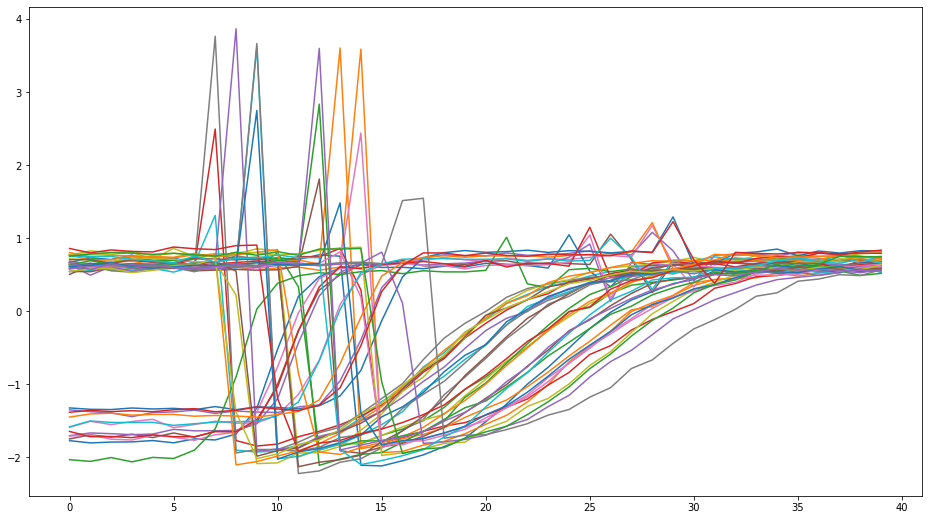

In [9]:
plt.figure(figsize=(16,9))
for i in range(a.shape[0]):
    plt.plot(a[i])


Euclidean k-means
16.434 --> 9.437 --> 9.437 --> 


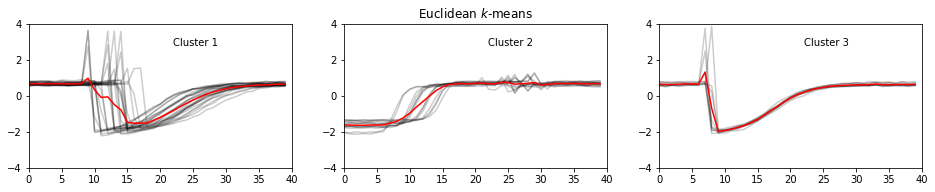

In [10]:
# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)
plt.figure(figsize=(16,9))
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


0.637 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.458 --> 0.458 --> 
Init 2
0.826 --> 0.525 --> 0.477 --> 0.472 --> 0.472 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


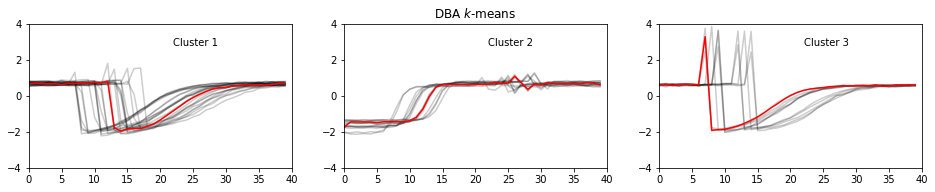

In [11]:
# DBA-k-means
print("DBA k-means")
plt.figure(figsize=(16,9))
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred = dba_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

Soft-DTW k-means
12.190 --> 3.277 --> 3.259 --> 3.261 --> 3.271 --> 3.266 --> 3.262 --> 3.262 --> 3.270 --> 3.265 --> 3.259 --> 3.260 --> 3.267 --> 3.262 --> 3.255 --> 3.255 --> 3.263 --> 3.258 --> 3.251 --> 3.250 --> 3.258 --> 3.252 --> 3.244 --> 3.244 --> 3.251 --> 3.247 --> 3.241 --> 3.242 --> 3.247 --> 3.244 --> 3.241 --> 3.241 --> 3.244 --> 3.243 --> 3.241 --> 3.241 --> 3.243 --> 3.242 --> 3.241 --> 3.241 --> 3.242 --> 3.241 --> 3.241 --> 3.241 --> 3.241 --> 3.241 --> 3.241 --> 3.241 --> 3.241 --> 3.241 --> 


IndexError: index 2 is out of bounds for axis 0 with size 2

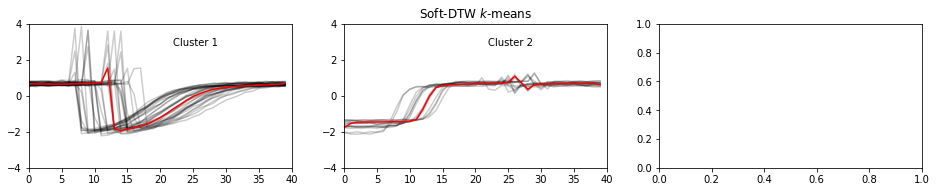

In [15]:


plt.figure(figsize=(16,9))

# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=2,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)


for yi in range(3):
    plt.subplot(3, 3, 7 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()